### Bike Sharing Assignment

OBJECTIVE

Main objective of this assignment is to build a multiple linear regression module to assist the enterprise with demand forecasting, marketing, revenue generation and increase loyality.


### STEPS TO BUILD MULITPLE LINEAR REGRESSION MODEL

1) Understand the Dataset provided
2) Visualising the Data
3) 

In [6]:
#Import the necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [7]:
#Load the dataset into Panda dataframe

data = pd.read_csv('day.csv')

#Display the first 10 rows of the dataset

data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [8]:
#Check the shape of the dataset

data.shape

(730, 16)

In [9]:
#Examine the Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
#Check the Data Types

data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [11]:
#Check the statistics for numerical varibles

data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
#Check the values of the categorical variables 

data.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [13]:
data.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [14]:
data.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [15]:
data.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

### CONCLUSIONS FROM READING THE DATASET PROVIDED

Dataset has 730 Rows and 16 Columns

Dataset has No Null Values

Data has correct Data Types for each column except for dteday

instant column can be dropped as it is just an index of the rows

There are categorical variables with numerical representation, namely season, weathersit, weekday, mnth (Month)

Ther are categorical variable with binary representation namely yr, holiday, workingday

## Dataset is clean and some data is already encoded and ready for Linear Regression model. However, we need to transform some categorical variables before building the model.


### Visualising the Data

In [18]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

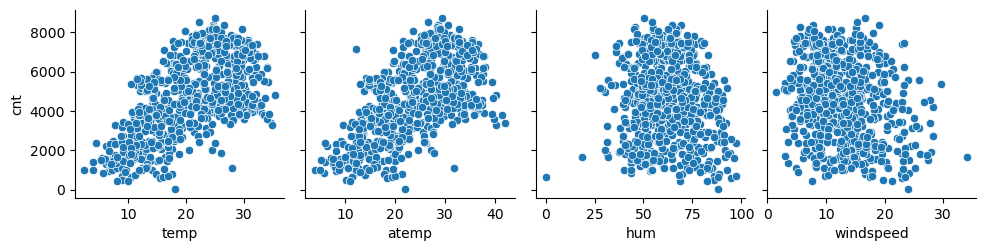

In [19]:
#Our Target variable for the model is cnt i.e the total number of bike rentals. 
#Lets plot some pair plots to understand the association between predictor and target variables

sns.pairplot(data, x_vars=['temp','atemp','hum','windspeed'], y_vars='cnt')
plt.show()

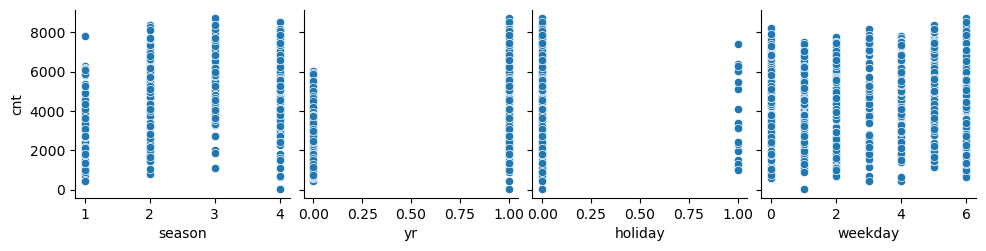

In [20]:
#Pair plots between categorical predictor variable and the target variable

sns.pairplot(data, x_vars=['season', 'yr','holiday', 'weekday'], y_vars='cnt')
plt.show()

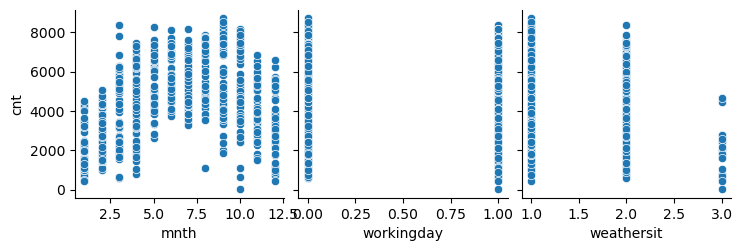

In [21]:
#Check the association between remaning predictor variables and the target variable

sns.pairplot(data, x_vars=['mnth', 'workingday','weathersit'], y_vars='cnt')
plt.show()

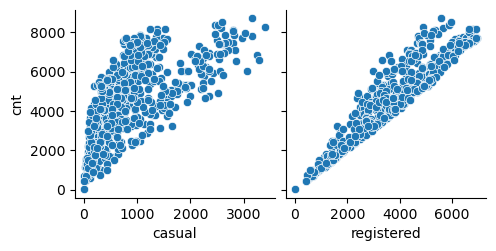

In [22]:
# Check association between the causual, registered and total count

sns.pairplot(data, x_vars=['casual', 'registered'], y_vars='cnt')
plt.show()

#### Visualise categorial variables with box plots

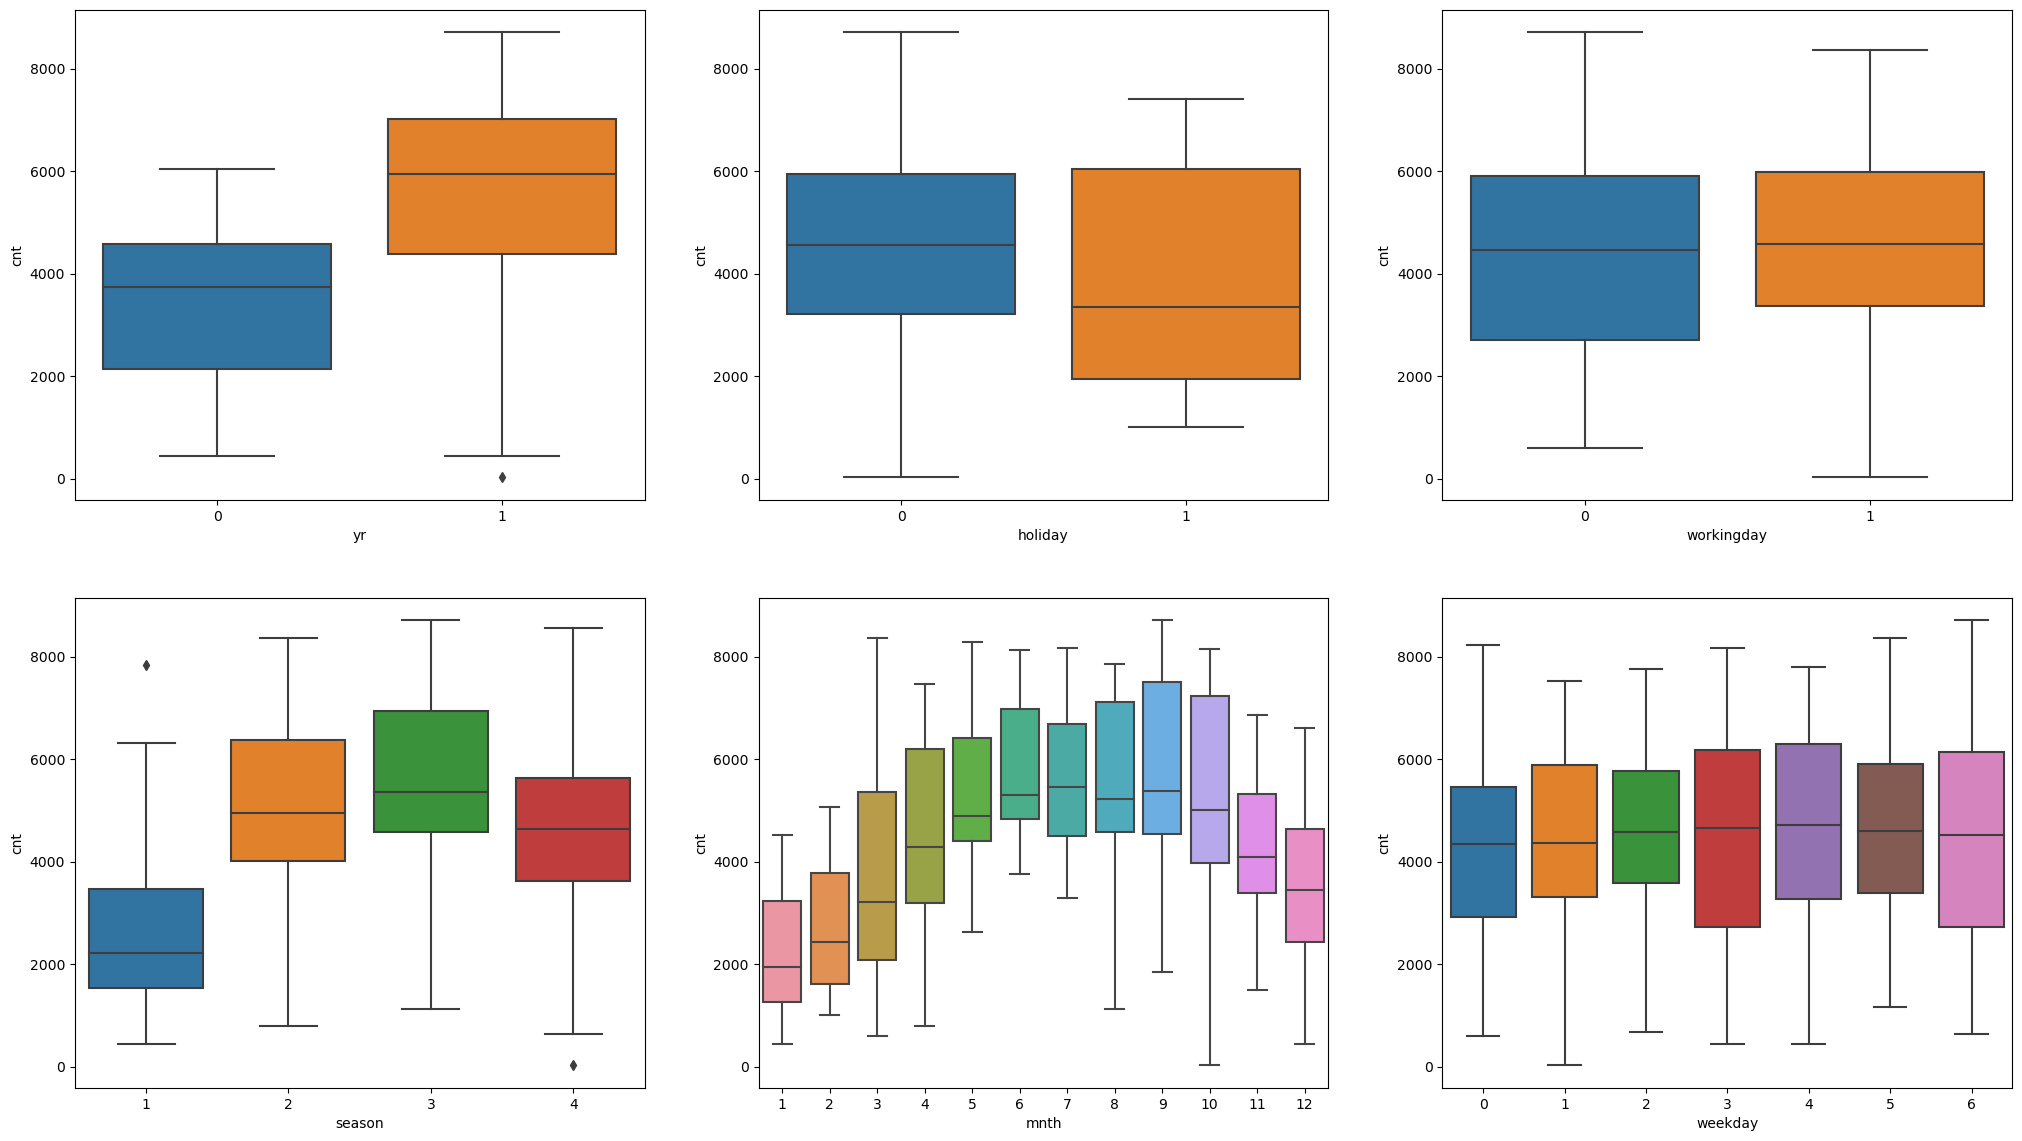

In [24]:
#Box plot representation

plt.figure(figsize = (25,14))

plt.subplot(2,3,1)
sns.boxplot(data = data, x = 'yr', y = 'cnt')

plt.subplot(2,3,2)
sns.boxplot(data = data, x = 'holiday', y = 'cnt')

plt.subplot(2,3,3)
sns.boxplot(data = data, x = 'workingday', y = 'cnt')

plt.subplot(2,3,4)
sns.boxplot(data = data, x = 'season', y = 'cnt')

plt.subplot(2,3,5)
sns.boxplot(data = data, x = 'mnth', y = 'cnt')

plt.subplot(2,3,6)
sns.boxplot(data = data, x = 'weekday', y = 'cnt')

plt.show()

In [42]:
data.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

In [44]:
data.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64